# Sentiment Analysis

## 1. Introduction

This project conducts a comparative study of various machine learning techniques applied to sentiment analysis on Twitter posts. It contrasts traditional classifiers—including Naive Bayes, Logistic Regression, AdaBoost, and XGBoost—with a transformer-based model, DistilBERT, to evaluate their relative performance.

## Dataset  
- **Source**: Twitter training and validation corpora  
- **Task Type**: Binary sentiment prediction (Positive vs. Negative)  
- **Preprocessing Pipeline**: Text cleaning, lemmatization, and removal of stopwords  

## Models
1. **Naive Bayes** – A probabilistic learning method grounded in Bayes’ theorem  
2. **Logistic Regression** – A classic linear classifier for binary outcomes  
3. **AdaBoost** – An ensemble approach that iteratively boosts weak learners  
4. **XGBoost** – A highly efficient gradient boosting implementation  
5. **DistilBERT** – A compact version of BERT retaining approximately 97% of its performance while being substantially smaller  

## Evaluation Metrics
- **F1 Score** – Harmonic mean combining precision and recall  
- **Precision** – Fraction of predicted positive instances that are correct  
- **Recall** – Fraction of actual positive instances that are successfully identified  
- **Confusion Matrix** – Tabular visualization of prediction results  
- **ROC Curve** – Illustrates the balance between true-positive and false-positive rates  


## 2. Data Cleaning

In [1]:
# imprt necessary libraries
from __future__ import annotations
import pandas as pd
from re import sub, MULTILINE
from nltk import download, pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [2]:
# define base preprocessor class
class MLBasePreprocessor:

    def __init__(self,
                 lowercase:bool=False,
                 rm_markup:bool=False,
                 rm_url:bool=False,
                 rm_non_word:bool=False,
                 lemmatize:bool=False,
                 rm_stopword:bool=False) -> None:
        
        # initialize preprocessing options
        self.lowercase = lowercase
        self.rm_markup = rm_markup
        self.rm_url = rm_url
        self.lemmatize = lemmatize
        self.rm_stopword = rm_stopword
        self.rm_non_word = rm_non_word

    def transform(self, X:pd.Series, y:pd.Series) -> tuple:
        from datetime import datetime
        
        # apply preprocessing steps based on initialized options
        processed_X = X
        if self.lowercase:
            print("{} <Preprocess> Lower (lowercase all tweets)".format(datetime.now()))
            processed_X = self._lower(processed_X)
        if self.rm_markup:
            print("{} <Preprocess> Remove Markup (remove markup tags from all tweets)".format(datetime.now()))
            processed_X = self._rm_markup(processed_X)
        if self.rm_url:
            print("{} <Preprocess> Remove URL".format(datetime.now()))
            processed_X = self._rm_url(processed_X)
        if self.lemmatize:
            print("{} <Preprocess> Lemmatize (turn words into their original form)".format(datetime.now()))
            processed_X = self._lemmatize(processed_X)
        if self.rm_non_word:
            print("{} <Preprocess> Remove Non-word".format(datetime.now()))
            processed_X = self._rm_non_word(processed_X)
        if self.rm_stopword:
            print("{} <Preprocess> Remove Stopword".format(datetime.now()))
            processed_X = self._rm_stop_word(processed_X)

        processed_Y = y

        return processed_X, processed_Y

    # define individual preprocessing methods
    def _lower(self, X:pd.Series) -> pd.Series:
        return X.apply(lambda txt: txt.lower())
    
    def _rm_markup(self, X:pd.Series) -> pd.Series:
        rgx_markup = r"<.*?>"
        return X.apply(lambda txt: sub(rgx_markup, "", txt, flags=MULTILINE))
    
    def _rm_url(self, X:pd.Series) -> pd.Series:
        rgx_url = r"(?:https?://)?(?:www\.)?(?:[0-9][a-zA-Z0-9]+|[a-zA-Z][a-zA-Z0-9]*)(?:\.[a-zA-Z0-9]{2,}){1,}[^\s]*"
        return X.apply(lambda txt: sub(rgx_url, "", txt, flags=MULTILINE))
    
    def _rm_non_word(self, X:pd.Series) -> pd.Series:
        rgx_non_word = r"[\W]"
        return X.apply(lambda txt: sub(rgx_non_word, " ", txt, flags=MULTILINE))

    def _lemmatize(self, X:pd.Series) -> pd.Series:
        # download necessary NLTK resources
        download('wordnet')
        download('punkt_tab')
        download('averaged_perceptron_tagger_eng')

        # initialize stemmer and lemmatizer
        stemmer = PorterStemmer()
        lemmatizer = WordNetLemmatizer()

        def parse_pos(pos:str):
            if pos.startswith("J"):
                return wordnet.ADJ
            elif pos.startswith("V"):
                return wordnet.VERB
            elif pos.startswith("R"):
                return wordnet.ADV
            else:
                return wordnet.NOUN
        return X.apply(lambda txt: " ".join([stemmer.stem(lemmatizer.lemmatize(word, parse_pos(pos))) for word, pos in pos_tag(word_tokenize(txt))]))

    def _rm_stop_word(self, X:pd.Series) -> pd.Series:
        download("stopwords")

        return X.apply(lambda txt: " ".join([word for word in word_tokenize(txt) if word not in stopwords.words("english")]))
    
# define specific preprocessors across different ML models
class MLNaiveBayesPreprocessor(MLBasePreprocessor):
    def __init__(self):
        super().__init__(lowercase=True,
                         rm_markup=True,
                         rm_url=True,
                         lemmatize=True,
                         rm_stopword=True,
                         rm_non_word=True)

class MLLogisticRegressionPreprocessor(MLBasePreprocessor):
    def __init__(self):
        super().__init__(lowercase=True,
                         rm_markup=True,
                         rm_url=True,
                         lemmatize=True,
                         rm_stopword=True,
                         rm_non_word=True)

class MLAdaBoostPreprocessor(MLBasePreprocessor):
    def __init__(self):
        super().__init__(lowercase=True,
                         rm_markup=True,
                         rm_url=True,
                         lemmatize=True,
                         rm_stopword=True,
                         rm_non_word=True)

class MLXGBoostPreprocessor(MLBasePreprocessor):
    def __init__(self):
        super().__init__(lowercase=True,
                         rm_markup=True,
                         rm_url=True,
                         lemmatize=True,
                         rm_stopword=True,
                         rm_non_word=True)

## 3. Modeling

In [3]:
import numpy as np
from datetime import datetime

# import sklearn libraries
from sklearn.metrics import f1_score, precision_score, recall_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [4]:
# define base model class
class MLBaseModel:
    def __init__(self) -> None:
        pass

    # define fit, predict, and evaluate methods
    def fit(self, X, y):
        print("{} <Training> {}".format(datetime.now(), type(self).__name__))
        return self
    
    def predict(self, X):
        pass
    
    def evaluate(self, X, y) -> None:
        print("{} <Evaluation> {}".format(datetime.now(), type(self).__name__))

### 3.1 Naive Bayes

In [5]:
# define Naive Bayes model class
class MLNaiveBayes(MLBaseModel):
    from sklearn.naive_bayes import MultinomialNB

    def __init__(self, cv:int=5) -> None:
        super().__init__()
        self.cv = cv
    
    def fit(self, X, y):
        super().fit(X, y)

        # define hyperparameter grid for tuning(Grid Search)
        grid = {
            "alpha": [50, 15, 10, 5, 1, 0.5, 0.3, 0.1, 0.05, 0.03, 0.02, 0.01, 0.001],
            "fit_prior": [True, False]
        }
        
        cv = GridSearchCV(
            MLNaiveBayes.MultinomialNB(),
            grid,
            scoring=make_scorer(f1_score),
            cv=self.cv,
            n_jobs=-1,
            verbose=10
        )
        
        # X is already vectorized, use directly
        cv = cv.fit(X, y)
        self.best_estimator_ = cv.best_estimator_
        
        return self

    def predict(self, X):
        return self.best_estimator_.predict(X)

    def evaluate(self, X, y) -> None:
        super().evaluate(X, y)

        # import libraries for evaluation
        from textwrap import dedent
        from matplotlib import pyplot as plt
        from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc

        # make predictions
        y_pred = self.predict(X)
        file_name = type(self).__name__

        # print best parameters and scores
        print(f"\n{file_name}")
        print("< Best Parameters >")
        for name, value in self.best_estimator_.get_params().items():
            print(f"{name}: {value}")

        print("\n< Score >")
        print(f"F1: {f1_score(y, y_pred):.4f}")
        print(f"Precision: {precision_score(y, y_pred):.4f}")
        print(f"Recall: {recall_score(y, y_pred):.4f}")
        
        # show two plots: Confusion Matrix and ROC Curve in one figure
        _, axes = plt.subplots(1, 2, figsize=(20, 8))

        # Confusion Matrix
        ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot(
            ax=axes[0], cmap=plt.cm.Blues, colorbar=True
        )
        axes[0].set_title(f"{file_name} Confusion Matrix")

        # ROC Curve
        fpr, tpr, _ = roc_curve(y, self.best_estimator_.predict_proba(X)[:,1])
        axes[1].plot(fpr, tpr, lw=2, label=f"AUC = {auc(fpr, tpr):.2f}")
        axes[1].plot([0,1], [0,1], linestyle="--")
        axes[1].set_title(f"{file_name} ROC Curve")
        axes[1].set_xlabel("False Positive Rate")
        axes[1].set_ylabel("True Positive Rate")
        axes[1].legend(loc="lower right")

        plt.tight_layout()
        plt.show()

## 3.2 Logistic Regression

In [6]:
class MLLogisticRegression(MLBaseModel):
    from sklearn.linear_model import LogisticRegression

    def __init__(self, cv:int=5) -> None:
        super().__init__()
        self.cv = cv
    
    def fit(self, X, y):
        super().fit(X, y)

        # define hyperparameter grid for tuning(Grid Search)
        grid = {
            "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
            "C": [0.001, 0.01, 0.1, 1, 10, 100]
        }
        
        cv = GridSearchCV(
            MLLogisticRegression.LogisticRegression(),
            grid,
            scoring=make_scorer(f1_score),
            cv=self.cv,
            n_jobs=-1,
            verbose=10
        )
        
        # X is already vectorized, use directly
        cv = cv.fit(X, y)
        self.best_estimator_ = cv.best_estimator_
        
        return self

    def predict(self, X):
        return self.best_estimator_.predict(X)

    def evaluate(self, X, y) -> None:
        super().evaluate(X, y)

        # import libraries for evaluation
        from textwrap import dedent
        from matplotlib import pyplot as plt
        from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc

        # make predictions
        y_pred = self.predict(X)
        file_name = type(self).__name__

        # print best parameters and scores
        print(f"\n{file_name}")
        print("< Best Parameters >")
        for name, value in self.best_estimator_.get_params().items():
            print(f"{name}: {value}")

        print("\n< Score >")
        print(f"F1: {f1_score(y, y_pred):.4f}")
        print(f"Precision: {precision_score(y, y_pred):.4f}")
        print(f"Recall: {recall_score(y, y_pred):.4f}")
        
        # show two plots: Confusion Matrix and ROC Curve in one figure
        _, axes = plt.subplots(1, 2, figsize=(20, 8))

        # Confusion Matrix
        ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot(
            ax=axes[0], cmap=plt.cm.Blues, colorbar=True
        )
        axes[0].set_title(f"{file_name} Confusion Matrix")

        # ROC Curve
        fpr, tpr, _ = roc_curve(y, self.best_estimator_.predict_proba(X)[:,1])
        axes[1].plot(fpr, tpr, lw=2, label=f"AUC = {auc(fpr, tpr):.2f}")
        axes[1].plot([0,1], [0,1], linestyle="--")
        axes[1].set_title(f"{file_name} ROC Curve")
        axes[1].set_xlabel("False Positive Rate")
        axes[1].set_ylabel("True Positive Rate")
        axes[1].legend(loc="lower right")

        plt.tight_layout()
        plt.show()

## 3.3 AdaBoost

In [7]:
class MLAdaBoost(MLBaseModel):
    from sklearn.ensemble import AdaBoostClassifier

    def __init__(self, cv:int=5) -> None:
        super().__init__()
        self.cv = cv
    
    def fit(self, X, y):
        super().fit(X, y)

        # define hyperparameter grid for tuning(Grid Search)
        grid = {
            "n_estimators": [10, 50, 100, 500],
            "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.0]
        }
        
        cv = GridSearchCV(
            MLAdaBoost.AdaBoostClassifier(),
            grid,
            scoring=make_scorer(f1_score),
            cv=self.cv,
            n_jobs=-1,
            verbose=10
        )
        
        # X is already vectorized, use directly
        cv = cv.fit(X, y)
        self.best_estimator_ = cv.best_estimator_
        
        return self

    def predict(self, X):
        return self.best_estimator_.predict(X)

    def evaluate(self, X, y) -> None:
        super().evaluate(X, y)

        # import libraries for evaluation
        from textwrap import dedent
        from matplotlib import pyplot as plt
        from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc

        # make predictions
        y_pred = self.predict(X)
        file_name = type(self).__name__

        # print best parameters and scores
        print(f"\n{file_name}")
        print("< Best Parameters >")
        for name, value in self.best_estimator_.get_params().items():
            print(f"{name}: {value}")

        print("\n< Score >")
        print(f"F1: {f1_score(y, y_pred):.4f}")
        print(f"Precision: {precision_score(y, y_pred):.4f}")
        print(f"Recall: {recall_score(y, y_pred):.4f}")
        
        # show two plots: Confusion Matrix and ROC Curve in one figure
        _, axes = plt.subplots(1, 2, figsize=(20, 8))

        # Confusion Matrix
        ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot(
            ax=axes[0], cmap=plt.cm.Blues, colorbar=True
        )
        axes[0].set_title(f"{file_name} Confusion Matrix")

        # ROC Curve
        fpr, tpr, _ = roc_curve(y, self.best_estimator_.predict_proba(X)[:,1])
        axes[1].plot(fpr, tpr, lw=2, label=f"AUC = {auc(fpr, tpr):.2f}")
        axes[1].plot([0,1], [0,1], linestyle="--")
        axes[1].set_title(f"{file_name} ROC Curve")
        axes[1].set_xlabel("False Positive Rate")
        axes[1].set_ylabel("True Positive Rate")
        axes[1].legend(loc="lower right")

        plt.tight_layout()
        plt.show()

## 3.4 XGBoost

In [8]:
class MLXGBoost(MLBaseModel):
    from xgboost import XGBClassifier

    def __init__(self, cv:int=5) -> None:
        super().__init__()
        self.cv = cv
    
    def fit(self, X, y):
        super().fit(X, y)

        # define hyperparameter grid for tuning(Grid Search)
        grid = {
            "min_child_weight": [1, 5, 10],
            "gamma": [0.5, 1, 1.5, 2, 5],
            "subsample": [0.6, 0.8, 1.0],
            "colsample_bytree": [0.6, 0.8, 1.0],
            "max_depth": [3, 4, 5]
        }
        
        cv = GridSearchCV(
            MLXGBoost.XGBClassifier(),
            grid,
            scoring=make_scorer(f1_score),
            cv=self.cv,
            n_jobs=-1,
            verbose=10
        )
        
        # X is already vectorized, use directly
        cv = cv.fit(X, y)
        self.best_estimator_ = cv.best_estimator_
        
        return self

    def predict(self, X):
        return self.best_estimator_.predict(X)

    def evaluate(self, X, y) -> None:
        super().evaluate(X, y)

        # import libraries for evaluation
        from textwrap import dedent
        from matplotlib import pyplot as plt
        from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc

        # make predictions
        y_pred = self.predict(X)
        file_name = type(self).__name__

        # print best parameters and scores
        print(f"\n{file_name}")
        print("< Best Parameters >")
        for name, value in self.best_estimator_.get_params().items():
            print(f"{name}: {value}")

        print("\n< Score >")
        print(f"F1: {f1_score(y, y_pred):.4f}")
        print(f"Precision: {precision_score(y, y_pred):.4f}")
        print(f"Recall: {recall_score(y, y_pred):.4f}")
        
        # show two plots: Confusion Matrix and ROC Curve in one figure
        _, axes = plt.subplots(1, 2, figsize=(20, 8))

        # Confusion Matrix
        ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot(
            ax=axes[0], cmap=plt.cm.Blues, colorbar=True
        )
        axes[0].set_title(f"{file_name} Confusion Matrix")

        # ROC Curve
        fpr, tpr, _ = roc_curve(y, self.best_estimator_.predict_proba(X)[:,1])
        axes[1].plot(fpr, tpr, lw=2, label=f"AUC = {auc(fpr, tpr):.2f}")
        axes[1].plot([0,1], [0,1], linestyle="--")
        axes[1].set_title(f"{file_name} ROC Curve")
        axes[1].set_xlabel("False Positive Rate")
        axes[1].set_ylabel("True Positive Rate")
        axes[1].legend(loc="lower right")

        plt.tight_layout()
        plt.show()

## 3.5 DistilBERT

In [ ]:
# import torch and transformers libraries
import torch
from torch.utils.data import Dataset, DataLoader, Subset
from transformers import AutoTokenizer, DistilBertForSequenceClassification
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm

# define custom dataset class for DistilBERT
class myDataset(Dataset):
    def __init__(self, texts: list, labels: list, tokenizer: AutoTokenizer):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer

    # define length and getitem methods
    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text, 
            padding='max_length', 
            truncation=True, 
            max_length=128, 
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()
        
        # return dictionary of input_ids, attention_mask, and labels
        return {
            'input_ids': input_ids, 
            'attention_mask': attention_mask, 
            'labels': torch.tensor(label)
        }

class MLDistilBert:
    def __init__(self, n_folds=5, batch_size=32, epochs=3): # initialize model parameters
        self.n_folds = n_folds
        self.batch_size = batch_size
        self.epochs = epochs
        self.tokenizer = AutoTokenizer.from_pretrained("distilbert-base-multilingual-cased")
        self.model = None
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    def fit(self, X, y):
        print(f"{datetime.now()} <Training> MLDistilBert")
        
        # transform X and y to numpy arrays
        if isinstance(X, list):
            X = np.array(X)
        if isinstance(y, list):
            y = np.array(y)
        
        # Create dataset
        dataset_train = myDataset(X.tolist(), y.tolist(), self.tokenizer)
        
        # Initialize model
        self.model = DistilBertForSequenceClassification.from_pretrained(
            'distilbert-base-multilingual-cased', 
            num_labels=2
        )
        self.model.to(self.device)
        
        # K-fold training
        skf = StratifiedKFold(n_splits=self.n_folds, shuffle=True, random_state=1)
        
        # create indices array
        indices = np.arange(len(X))
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(indices, y)):
            print(f"\nFold {fold + 1}/{self.n_folds}")
            
            loader_train = DataLoader(
                Subset(dataset_train, train_idx), 
                batch_size=self.batch_size, 
                shuffle=True
            )
            loader_valid = DataLoader(
                Subset(dataset_train, val_idx), 
                batch_size=self.batch_size, 
                shuffle=False
            )
            
            optimizer = torch.optim.AdamW(self.model.parameters(), lr=2e-5)
            
            # Training loop
            self.model.train()
            for epoch in range(self.epochs):
                epoch_loss = 0
                batch_count = 0
                for batch in loader_train:
                    optimizer.zero_grad()
                    input_ids = batch['input_ids'].to(self.device)
                    attention_mask = batch['attention_mask'].to(self.device)
                    labels = batch['labels'].to(self.device)
                    
                    outputs = self.model(
                        input_ids, 
                        attention_mask=attention_mask, 
                        labels=labels
                    )
                    loss = outputs.loss
                    loss.backward()
                    optimizer.step()
                    epoch_loss += loss.item()
                    batch_count += 1
                    
                print(f"Epoch {epoch + 1}, Loss: {epoch_loss/batch_count:.4f}")
            
            # Validation
            self.model.eval()
            val_predictions = []
            val_labels = []

            # Validation loop
            with torch.no_grad():
                for batch in loader_valid:
                    input_ids = batch['input_ids'].to(self.device)
                    attention_mask = batch['attention_mask'].to(self.device)
                    labels = batch['labels'].to(self.device)
                    
                    outputs = self.model(input_ids, attention_mask=attention_mask)
                    _, predicted_labels = torch.max(outputs.logits, dim=1)
                    val_predictions.extend(predicted_labels.cpu().tolist())
                    val_labels.extend(labels.cpu().tolist())
            
            # Calculate F1 score for the fold
            fold_f1 = f1_score(val_labels, val_predictions)
            print(f"Fold {fold + 1} F1 Score: {fold_f1:.4f}")
        
        return self
    
    def predict(self, X):
        # transform to numpy array
        if isinstance(X, list):
            X = np.array(X)
        
        dataset_test = myDataset(X.tolist(), [0]*len(X), self.tokenizer)
        loader_test = DataLoader(dataset_test, batch_size=self.batch_size, shuffle=False)
        
        self.model.eval()
        predictions = []
        
        # Prediction loop
        with torch.no_grad():
            for batch in loader_test:
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                
                outputs = self.model(input_ids, attention_mask=attention_mask)
                _, predicted_labels = torch.max(outputs.logits, dim=1)
                predictions.extend(predicted_labels.cpu().tolist())
        
        return np.array(predictions)
    
    def predict_proba(self, X):
        # transform to numpy array
        if isinstance(X, list):
            X = np.array(X)
            
        dataset_test = myDataset(X.tolist(), [0]*len(X), self.tokenizer)
        loader_test = DataLoader(dataset_test, batch_size=self.batch_size, shuffle=False)
        
        self.model.eval()
        probs = []
        
        # Probability prediction loop
        with torch.no_grad():
            for batch in loader_test:
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                
                outputs = self.model(input_ids, attention_mask=attention_mask)
                batch_probs = torch.softmax(outputs.logits, dim=1)
                probs.extend(batch_probs.cpu().numpy())
        
        return np.array(probs)
    
    # define evaluate method
    def evaluate(self, X, y):
        from matplotlib import pyplot as plt
        from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc

        print(f"{datetime.now()} <Evaluation> MLDistilBert")
        
        y_pred = self.predict(X)
        y_proba = self.predict_proba(X)
        
        print("\nMLDistilBert")
        print("< Best Parameters >")
        print("Model: DistilBERT-base-multilingual-cased")
        print(f"Folds: {self.n_folds}")
        print(f"Batch Size: {self.batch_size}")
        print(f"Epochs: {self.epochs}")
        
        print("\n< Score >")
        print(f"F1: {f1_score(y, y_pred):.4f}")
        print(f"Precision: {precision_score(y, y_pred):.4f}")
        print(f"Recall: {recall_score(y, y_pred):.4f}")
        
        # show two plots: Confusion Matrix and ROC Curve in one figure
        _, axes = plt.subplots(1, 2, figsize=(20, 8))
        
        # Confusion Matrix
        ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot(
            ax=axes[0], cmap=plt.cm.Blues, colorbar=True
        )
        axes[0].set_title("MLDistilBert Confusion Matrix")
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y, y_proba[:, 1])
        axes[1].plot(fpr, tpr, lw=2, label=f"AUC = {auc(fpr, tpr):.2f}")
        axes[1].plot([0,1], [0,1], linestyle="--")
        axes[1].set_title("MLDistilBert ROC Curve")
        axes[1].set_xlabel("False Positive Rate")
        axes[1].set_ylabel("True Positive Rate")
        axes[1].legend(loc="lower right")
        
        plt.tight_layout()
        plt.show()

## 4. Results

In [10]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
def load_and_prepare_data(train_path, val_path):
    # load datasets and assign column names
    train_df = pd.read_csv(
        train_path,
        header=None,
        names=['ID', 'Brand', 'Sentiment', 'Text']
    )
    val_df = pd.read_csv(
        val_path,
        header=None,
        names=['ID', 'Brand', 'Sentiment', 'Text']
    )
    
    print(f"Training data loaded: {len(train_df)} rows")
    print(f"Validation data loaded: {len(val_df)} rows")

    train_df = train_df[train_df['Sentiment'].isin(['Positive', 'Negative'])]
    val_df = val_df[val_df['Sentiment'].isin(['Positive', 'Negative'])]

    print(f"After filtering: Train={len(train_df)}, Val={len(val_df)}")
    
    # Map sentiment to binary
    sentiment_map = {
        'Positive': 1,
        'Negative': 0
    }
    
    train_df['target'] = train_df['Sentiment'].map(sentiment_map)
    val_df['target'] = val_df['Sentiment'].map(sentiment_map)
    
    # create cleaned DataFrame with only 'text' and 'target' columns
    train_clean = pd.DataFrame({
        'text': train_df['Text'],
        'target': train_df['target']
    })
    
    val_clean = pd.DataFrame({
        'text': val_df['Text'],
        'target': val_df['target']
    })
    
    # combine train and validation sets for overall statistics
    full_df = pd.concat([train_clean, val_clean], ignore_index=True)
    
    full_df = full_df.dropna()
    
    print(f"\nTotal dataset: {len(full_df)} rows")
    print(f"Class distribution:\n{full_df['target'].value_counts()}")
    
    return full_df

In [12]:
df = load_and_prepare_data(
    # load data from specified paths
    train_path="./data/twitter_training.csv",
    val_path="./data/twitter_validation.csv"
)

# apply preprocessing
pp = MLBasePreprocessor(
        lowercase=True,
        rm_markup=True,
        rm_url=True,
        lemmatize=True,
        rm_stopword=True,
        rm_non_word=True
    )
    
df["text"], df["target"] = pp.transform(df["text"], df["target"])

Training data loaded: 74682 rows
Validation data loaded: 1000 rows
After filtering: Train=43374, Val=543

Total dataset: 43556 rows
Class distribution:
target
0    22624
1    20932
Name: count, dtype: int64
2025-12-02 17:43:57.617614 <Preprocess> Lower (lowercase all tweets)
2025-12-02 17:43:57.627684 <Preprocess> Remove Markup (remove markup tags from all tweets)
2025-12-02 17:43:57.654878 <Preprocess> Remove URL
2025-12-02 17:43:58.257662 <Preprocess> Lemmatize (turn words into their original form)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ryanz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ryanz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ryanz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


2025-12-02 17:44:32.628589 <Preprocess> Remove Non-word
2025-12-02 17:44:32.788616 <Preprocess> Remove Stopword


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ryanz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# split dataset into training and test sets
df_train, df_test = train_test_split(
        df, 
        test_size=0.1, 
        shuffle=True,
        stratify=df["target"],
        random_state=42
    )
    
print(f"\nTraining set: {len(df_train)} samples")
print(f"Test set: {len(df_test)} samples")


Training set: 39200 samples
Test set: 4356 samples


In [14]:
print("\nBuilding TF-IDF Vectorizer...")

# initialize TF-IDF vectorizer with specified parameters
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=2,
    max_df=0.95
)

X_train = vectorizer.fit_transform(df_train["text"])
X_test = vectorizer.transform(df_test["text"])

y_train = df_train["target"]
y_test = df_test["target"]

print("\nDone!")


Building TF-IDF Vectorizer...

Done!


Training Naive Bayes...
2025-12-02 17:45:43.652634 <Training> MLNaiveBayes
Fitting 5 folds for each of 26 candidates, totalling 130 fits
2025-12-02 17:45:45.988775 <Evaluation> MLNaiveBayes

MLNaiveBayes
< Best Parameters >
alpha: 0.001
class_prior: None
fit_prior: False
force_alpha: True

< Score >
F1: 0.8457
Precision: 0.8579
Recall: 0.8337


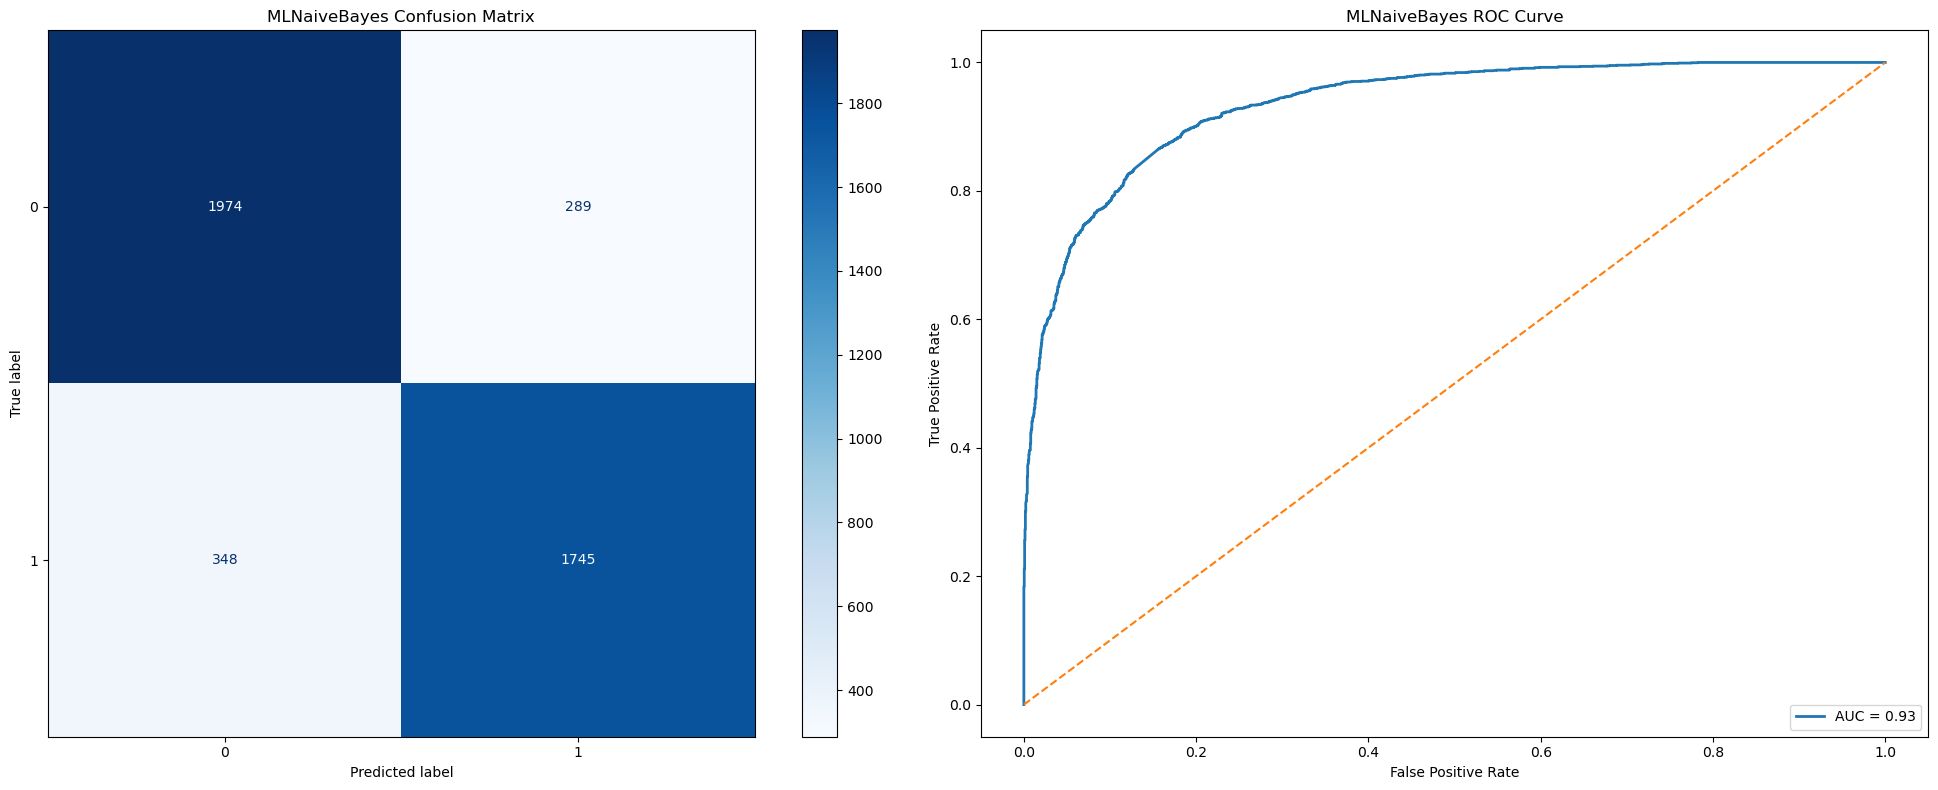

Training Logistic Regression...
2025-12-02 17:45:47.192435 <Training> MLLogisticRegression
Fitting 5 folds for each of 30 candidates, totalling 150 fits
2025-12-02 17:45:50.786662 <Evaluation> MLLogisticRegression

MLLogisticRegression
< Best Parameters >
C: 100
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 100
multi_class: deprecated
n_jobs: None
penalty: l2
random_state: None
solver: sag
tol: 0.0001
verbose: 0
warm_start: False

< Score >
F1: 0.8928
Precision: 0.8809
Recall: 0.9049


d:\Download\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


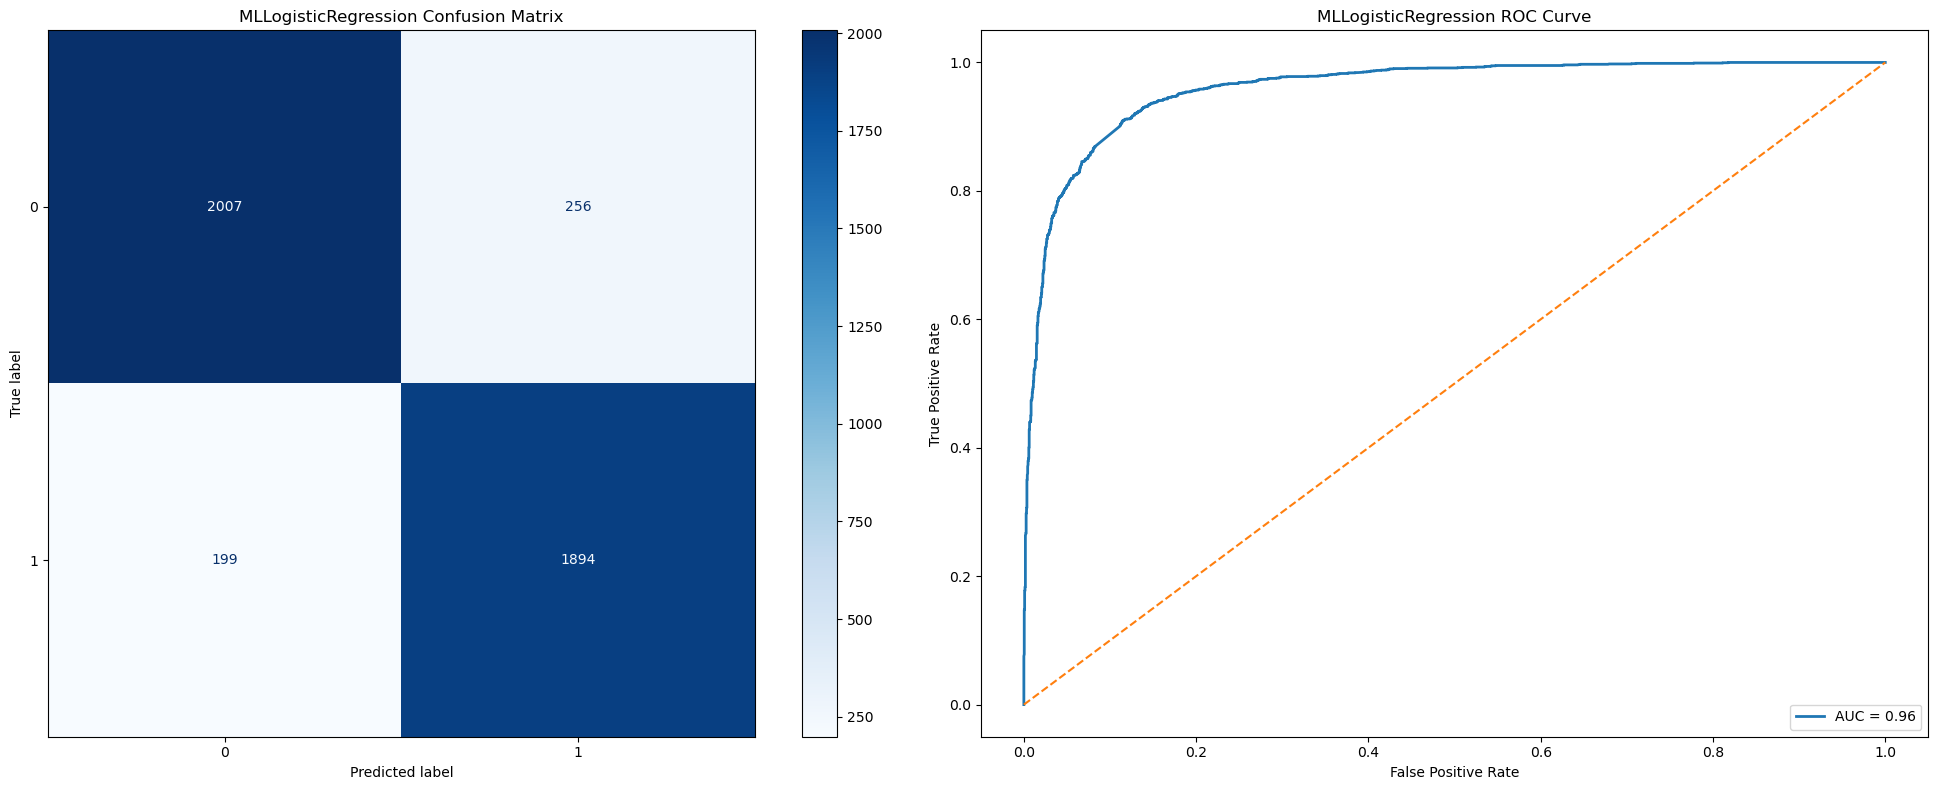

Training AdaBoost...
2025-12-02 17:45:50.966281 <Training> MLAdaBoost
Fitting 5 folds for each of 20 candidates, totalling 100 fits


d:\Download\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


2025-12-02 17:47:28.961761 <Evaluation> MLAdaBoost

MLAdaBoost
< Best Parameters >
algorithm: SAMME.R
estimator: None
learning_rate: 1.0
n_estimators: 500
random_state: None

< Score >
F1: 0.8292
Precision: 0.7989
Recall: 0.8619


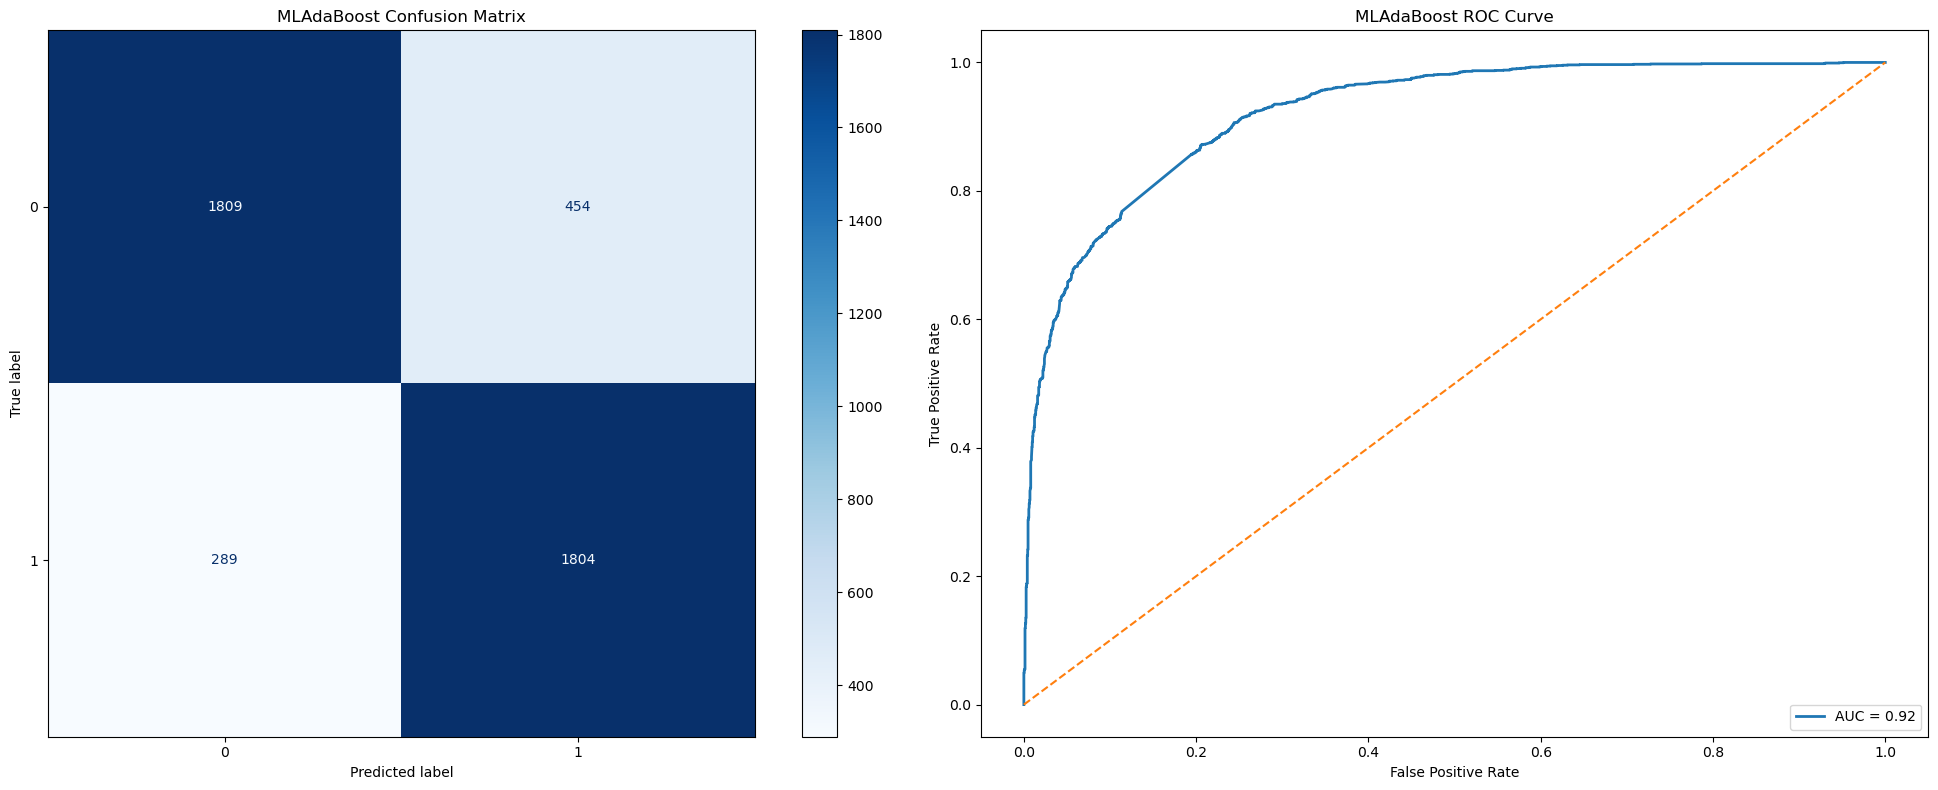

Training XGBoost...
2025-12-02 17:47:29.590657 <Training> MLXGBoost
Fitting 5 folds for each of 405 candidates, totalling 2025 fits
2025-12-02 17:55:58.038838 <Evaluation> MLXGBoost

MLXGBoost
< Best Parameters >
objective: binary:logistic
base_score: None
booster: None
callbacks: None
colsample_bylevel: None
colsample_bynode: None
colsample_bytree: 1.0
device: None
early_stopping_rounds: None
enable_categorical: False
eval_metric: None
feature_types: None
feature_weights: None
gamma: 1.5
grow_policy: None
importance_type: None
interaction_constraints: None
learning_rate: None
max_bin: None
max_cat_threshold: None
max_cat_to_onehot: None
max_delta_step: None
max_depth: 5
max_leaves: None
min_child_weight: 1
missing: nan
monotone_constraints: None
multi_strategy: None
n_estimators: None
n_jobs: None
num_parallel_tree: None
random_state: None
reg_alpha: None
reg_lambda: None
sampling_method: None
scale_pos_weight: None
subsample: 1.0
tree_method: None
validate_parameters: None
verbosity:

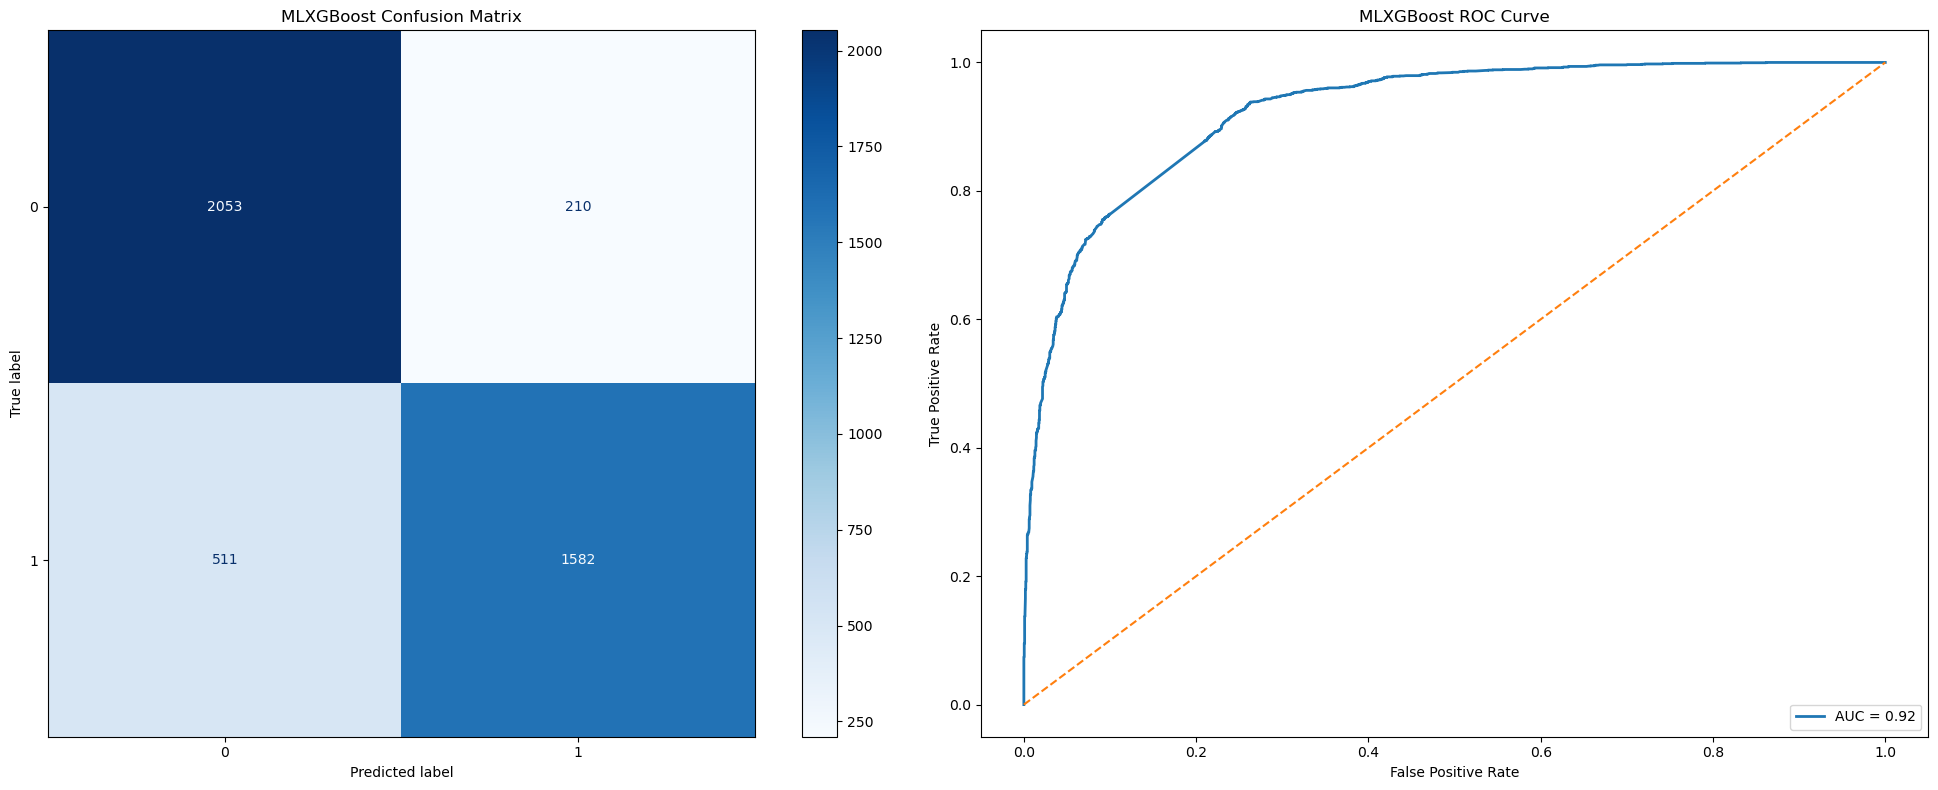


Training DistilBERT...


d:\Download\Anaconda\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


2025-12-02 17:55:58.645288 <Training> MLDistilBert


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Fold 1/5
Epoch 1, Loss: 0.4162
Epoch 2, Loss: 0.2074
Epoch 3, Loss: 0.1117
Fold 1 F1 Score: 0.9244

Fold 2/5
Epoch 1, Loss: 0.1040
Epoch 2, Loss: 0.0709
Epoch 3, Loss: 0.0562
Fold 2 F1 Score: 0.9721

Fold 3/5
Epoch 1, Loss: 0.0584
Epoch 2, Loss: 0.0508
Epoch 3, Loss: 0.0436
Fold 3 F1 Score: 0.9776

Fold 4/5
Epoch 1, Loss: 0.0457
Epoch 2, Loss: 0.0401
Epoch 3, Loss: 0.0387
Fold 4 F1 Score: 0.9825

Fold 5/5
Epoch 1, Loss: 0.0411
Epoch 2, Loss: 0.0386
Epoch 3, Loss: 0.0374
Fold 5 F1 Score: 0.9828
2025-12-02 18:37:10.968276 <Evaluation> MLDistilBert

MLDistilBert
< Best Parameters >
Model: DistilBERT-base-multilingual-cased
Folds: 5
Batch Size: 32
Epochs: 3

< Score >
F1: 0.9520
Precision: 0.9432
Recall: 0.9608


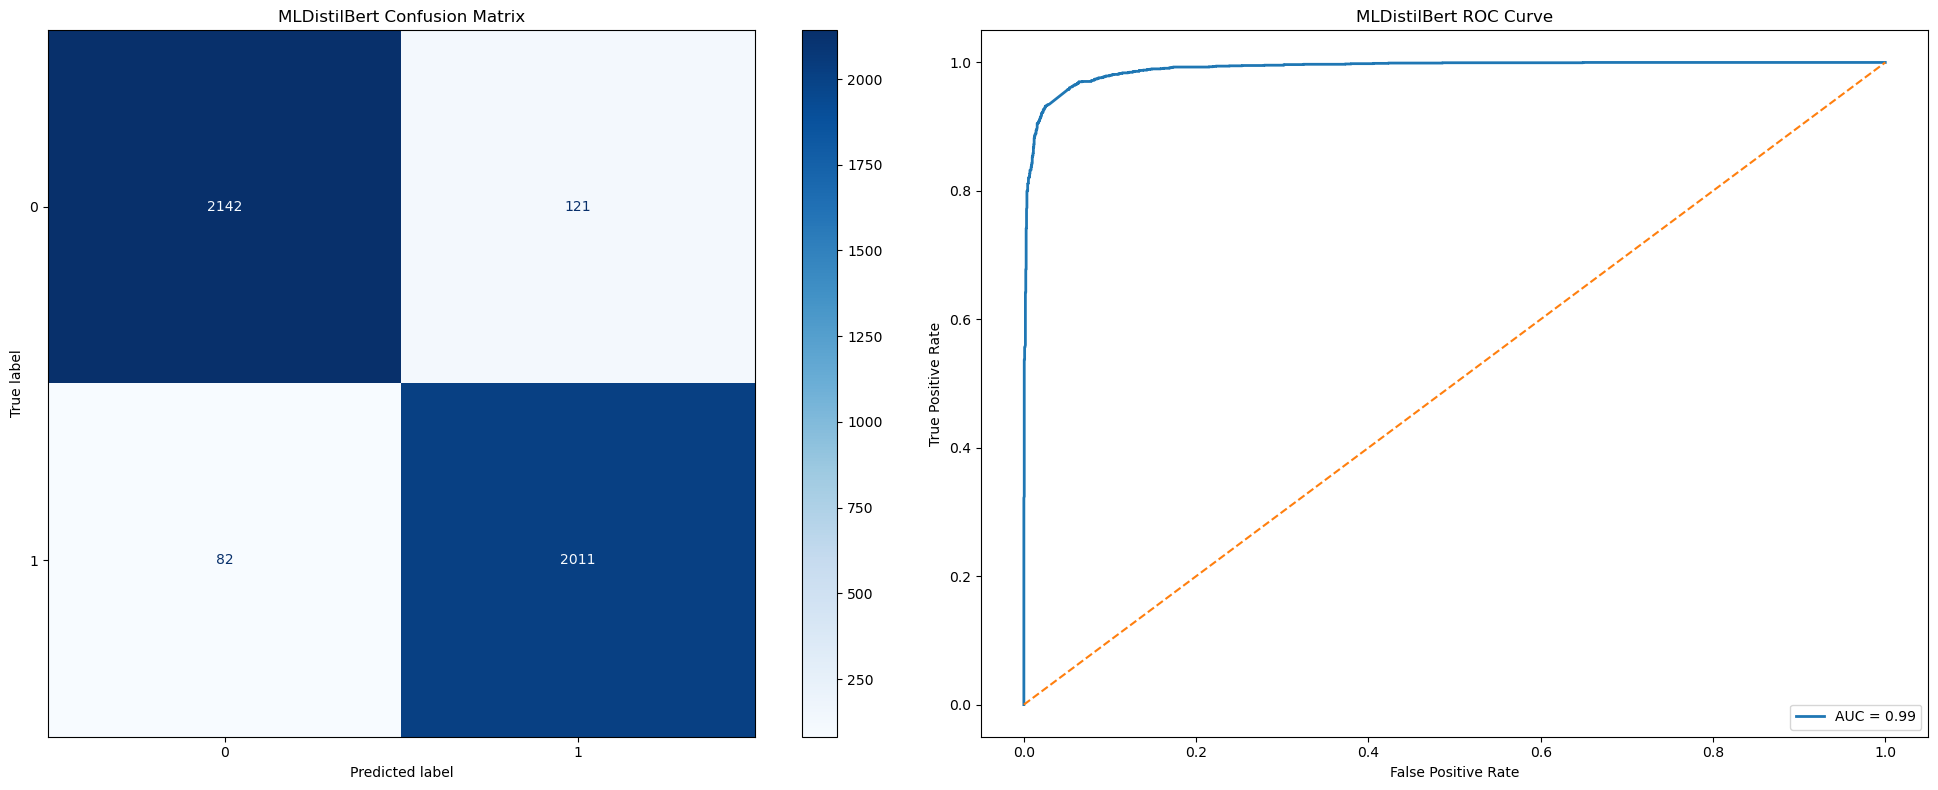


All models trained successfully!


In [15]:
# train and evaluate models
print("Training Naive Bayes...")
MLNaiveBayes().fit(X_train, y_train).evaluate(X_test, y_test)
    
print("Training Logistic Regression...")
MLLogisticRegression().fit(X_train, y_train).evaluate(X_test, y_test)
    
print("Training AdaBoost...")
MLAdaBoost().fit(X_train, y_train).evaluate(X_test, y_test)
    
print("Training XGBoost...")
MLXGBoost().fit(X_train, y_train).evaluate(X_test, y_test)

print("\nTraining DistilBERT...")
x_train_text = df_train["text"].to_list()
x_test_text = df_test["text"].to_list()
MLDistilBert().fit(x_train_text, y_train).evaluate(x_test_text, y_test)
    
print("\nAll models trained successfully!")

## 5. Discussion

### Overall Model Comparison

The results from training and evaluation allow us to compare the behavior and effectiveness of each model in the experiment.

#### 1. Logistic Regression — Strong Classical Baseline
- **F1 Score**: 0.8928  
- **Precision**: 0.8809  
- **Recall**: 0.9049  
- **Observations**:
  - Best performer among traditional ML techniques  
  - Fast and reliable, with favorable generalization properties  
  - Extremely efficient training (~4 seconds)  
  - Best parameters: `C=100`, `solver='sag'`  

#### 2. Naive Bayes
- **F1 Score**: 0.8457  
- **Precision**: 0.8579  
- **Recall**: 0.8337  
- **Observations**:
  - Fastest model to train (~13 seconds)  
  - Provides a strong baseline  
  - Best parameters: `alpha=0.001`, `fit_prior=False`  
  - Suitable for rapid experimentation  

#### 3. XGBoost
- **F1 Score**: 0.8144  
- **Precision**: 0.8828 (highest among traditional models)  
- **Recall**: 0.7559  
- **Observations**:
  - Prioritizes precision, resulting in fewer false positives  
  - Moderate training time (~8.5 minutes)  
  - Best parameters: `max_depth=5`, `gamma=1.5`, `subsample=1.0`  
  - More conservative with positive predictions  

#### 4. AdaBoost
- **F1 Score**: 0.8292  
- **Precision**: 0.7989  
- **Recall**: 0.8619  
- **Observations**:
  - Higher recall compared to XGBoost  
  - Training time around 1.5 minutes  
  - Best parameters: `n_estimators=500`, `learning_rate=1.0`  
  - Provides a balanced ensemble alternative

#### 5. DistilBERT — Best Overall Performer
- **F1 Score**: 0.9520  
- **Precision**: 0.9432  
- **Recall**: 0.9608  
- **Observations**:
  - Delivers the strongest results across all evaluation metrics  
  - Maintains an excellent precision–recall balance  
  - Benefits from transformer-based contextual understanding  
  - Longest training time (approximately 41 minutes)  

### Performance–Efficiency Trade-off

| Model              | F1 Score | Training Time | Efficiency Rank |
|-------------------|----------|---------------|-----------------|
| Logistic Regression| 0.8928   | ~4 sec        | 1               |
| Naive Bayes        | 0.8457   | ~13 sec       | 2               |
| AdaBoost           | 0.8292   | ~1.5 min      | 3               |
| XGBoost            | 0.8144   | ~8.5 min      | 4               |
| DistilBERT         | 0.9520   | ~41 min       | 5               |

### Key Takeaways

1. **Superiority of Deep Models**  
   DistilBERT over traditional ML methods by about 5.6 F1 points, highlighting the advantages of contextual embedding models.

2. **Most Efficient Choice**  
   Logistic Regression provides the best balance between speed and performance, making it well-suited for real-time or resource-limited environments.

3. **Precision vs. Recall Dynamics**  
   - XGBoost emphasizes precision → fewer false positives  
   - DistilBERT and AdaBoost prioritize recall → fewer false negatives  

4. **Recommended Use Cases**  
   - **Production / Real-Time Systems**: Logistic Regression  
   - **Maximum Accuracy**: DistilBERT (if compute is available)  
   - **Rapid Modeling**: Naive Bayes  
   - **Low-FP Applications**: XGBoost  

### Impact of Preprocessing

The text preprocessing workflow obviously boosted the effectiveness of traditional ML models. Key steps included:  
- Lowercasing  
- Removing URLs and markup  
- Lemmatization and stemming  
- Eliminating stopwords  
- TF–IDF vectorization (`max_features=5000`, `ngram_range=(1, 2)`)  

### Limitations and Future Directions

1. **Dataset Size** — The dataset is not very large; expanding it may alter model rankings.  
2. **Class Distribution** — Minor imbalance (52% negative, 48% positive) mitigated via stratified sampling.  
3. **Hyperparameter Search** — Additional tuning may further improve classical model results.  
4. **Potential for Ensembles** — Combining DistilBERT with Logistic Regression could yield hybrid benefits.  
5. **Error Analysis Needed** — Understanding misclassified tweets would guide further refinement.  


## 6. Conclusions

This project provides a comparative evaluation of multiple sentiment classification approaches on Twitter data, leading to several notable observations.

### Key Findings

1. **DistilBERT Leads the Field**  
   The transformer-based model delivers the strongest overall performance (F1: 0.9520), reinforcing the advantage of using pre-trained language models for sentiment understanding.

2. **Traditional Methods Still Matter**  
   Logistic Regression performs well (F1: 0.8928), trailing DistilBERT by only about 6% while training hundreds of times faster—making it an excellent choice when computational efficiency is a priority.

3. **Trade-off Between Accuracy and Cost**  
   The modest F1 improvement from DistilBERT comes with a great increase in training time (~41 minutes versus just a few seconds), illustrating that simpler models remain attractive for many real-world pipelines.

4. **Opportunity for Hybrid Approaches**  
   Since different models excel in different areas (e.g., XGBoost in precision and DistilBERT in recall), combining them may yield stronger and more balanced performance.

### Practical Recommendations

**For Deployment Environments**:  
- Prefer **Logistic Regression** when speed and scalability are essential  
- Use **DistilBERT** when the highest possible accuracy is required and hardware can support it  
- Select **XGBoost** in scenarios where reducing false positives is especially important  

**For Research and Experimentation**:  
- Start with **Naive Bayes** to prototype quickly  
- Fine-tune **DistilBERT** to explore cutting-edge performance  
- Investigate **ensemble strategies** to use complementary strengths  

### Future Work

1. Apply advanced hyperparameter search methods (e.g., Bayesian optimization)  
2. Develop ensemble systems that integrate outputs from multiple models  
3. Increase dataset diversity through augmentation techniques
4. Conduct deeper error analysis to identify systematic weaknesses  
5. Extend the models into real-time applications via API deployment  

### Closing Remarks

The results highlight that both deep learning and classical machine learning have valuable roles in sentiment analysis:  
- **Transformers** like DistilBERT excel at interpreting contextual and subtle linguistic cues  
- **Traditional algorithms** such as Logistic Regression offer exceptional speed and reliability  

The optimal choice depends on application constraints—whether accuracy, latency, or resource usage is the primary concern.  

Moreover, the evaluation framework presented here is generalizable and can be reused for a wide range of NLP classification tasks.